In [1]:
import os 
import glob 
import re 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D


In [2]:
file = glob.glob("Ouput_*")

In [3]:
print(file)

['Ouput_mpi_pop10_gen10_mut0.2', 'Ouput_mpi_pop10_gen10_mut0.5', 'Ouput_mpi_pop10_gen10_mut0.05', 'Ouput_mpi_pop10_gen20_mut0.2', 'Ouput_mpi_pop10_gen20_mut0.5', 'Ouput_mpi_pop10_gen20_mut0.05', 'Ouput_mpi_pop10_gen50_mut0.2', 'Ouput_mpi_pop10_gen50_mut0.5', 'Ouput_mpi_pop10_gen50_mut0.05', 'Ouput_mpi_pop10_gen100_mut0.2', 'Ouput_mpi_pop10_gen100_mut0.5', 'Ouput_mpi_pop10_gen100_mut0.05', 'Ouput_mpi_pop10_gen200_mut0.2', 'Ouput_mpi_pop10_gen200_mut0.5', 'Ouput_mpi_pop10_gen200_mut0.05', 'Ouput_mpi_pop20_gen10_mut0.2', 'Ouput_mpi_pop20_gen10_mut0.5', 'Ouput_mpi_pop20_gen10_mut0.05', 'Ouput_mpi_pop20_gen20_mut0.2', 'Ouput_mpi_pop20_gen20_mut0.5', 'Ouput_mpi_pop20_gen20_mut0.05', 'Ouput_mpi_pop20_gen50_mut0.2', 'Ouput_mpi_pop20_gen50_mut0.5', 'Ouput_mpi_pop20_gen50_mut0.05', 'Ouput_mpi_pop20_gen100_mut0.2', 'Ouput_mpi_pop20_gen100_mut0.5', 'Ouput_mpi_pop20_gen100_mut0.05', 'Ouput_mpi_pop20_gen200_mut0.2', 'Ouput_mpi_pop20_gen200_mut0.5', 'Ouput_mpi_pop20_gen200_mut0.05', 'Ouput_mpi_pop50_

In [4]:


# Get list of directories matching the pattern
file_list = glob.glob("Ouput_*")
All_value = []
pattern = r"Ouput_mpi_pop(\d+)_gen(\d+)_mut([\d\.]+)"

for i in file_list:
    match = re.search(pattern, i)
    if match:
        pop = int(match.group(1))
        gen = int(match.group(2))
        mut = float(match.group(3))

        # Read time_log.txt safely
        time_log_path = os.path.join(i, "time_log.txt")
        try:
            with open(time_log_path, "r") as time_file:
                time = float(time_file.read().strip()) / 60  # Convert seconds to minutes
        except FileNotFoundError:
            print(f"Warning: {time_log_path} not found.")
            time = None

        # Find and read CSV file(s)
        csv_files = glob.glob(os.path.join(i, "*.csv"))
        if csv_files:
            data = pd.read_csv(csv_files[0], sep=",")  # Read the first found CSV
            fitness_min = data["min"].tolist()  # Convert column to list
        else:
            print(f"Warning: No CSV found in {i}")
            fitness_min = None

        # Store results in dictionary
        result_dict = {"Gen": gen, "Pop": pop, "Mut": mut, "Time": time, "Fitness Min": fitness_min}
        All_value.append(result_dict)

print(All_value)  # Print final results


[{'Gen': 10, 'Pop': 10, 'Mut': 0.2, 'Time': 0.2501891016960144, 'Fitness Min': [0.0001084999999999, 8.200000000000072e-05, 4.550000000000008e-05, 4.550000000000008e-05, 4.550000000000008e-05, 4.550000000000008e-05, 4.550000000000008e-05, 4.550000000000008e-05, 2.549999999999984e-05, 1.6999999999999526e-05, 1.6999999999999526e-05]}, {'Gen': 10, 'Pop': 10, 'Mut': 0.5, 'Time': 0.6665409882863362, 'Fitness Min': [0.0001765, 0.0001765, 0.0001765, 0.0001489999999999, 0.0001489999999999, 0.0001489999999999, 0.0001489999999999, 0.0001489999999999, 0.0001489999999999, 0.0001489999999999, 0.0001489999999999]}, {'Gen': 10, 'Pop': 10, 'Mut': 0.05, 'Time': 0.4721781333287557, 'Fitness Min': [0.0002672499999999, 0.0001649999999999, 0.0001649999999999, 7.774999999999621e-05, 5.424999999999664e-05, 2.8249999999998925e-05, 2.8249999999998925e-05, 2.8249999999998925e-05, 2.8249999999998925e-05, 2.8249999999998925e-05, 2.8249999999998925e-05]}, {'Gen': 20, 'Pop': 10, 'Mut': 0.2, 'Time': 0.891127189000447

In [5]:
Time_list =[]
Gen_list =[]
Pop_list = []
Mut_list = []
Fit_list =[]
for j in range(len(All_value)) :
    dict = All_value[j]
    Gen_list.append(dict["Gen"])
    Pop_list.append(dict["Pop"])
    Time_list.append(dict["Time"])
    Mut_list.append(dict["Mut"])
    Fit_list.append(np.min(dict["Fitness Min"]))
    
print(Gen_list)
print(Pop_list)
print(Time_list)

[10, 10, 10, 20, 20, 20, 50, 50, 50, 100, 100, 100, 200, 200, 200, 10, 10, 10, 20, 20, 20, 50, 50, 50, 100, 100, 100, 200, 200, 200, 10, 10, 10, 20, 20, 20, 50, 50, 50, 100, 100, 100, 200, 200, 200, 10, 10, 10, 20, 20, 20, 50, 50, 50, 100, 100, 100, 200, 200, 200, 10, 10, 10, 20, 20, 20, 50, 50, 50, 100, 100, 100, 200, 200, 200]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
[0.2501891016960144, 0.6665409882863362, 0.4721781333287557, 0.8911271890004476, 3.077481810251872, 2.146139971415202, 1.6785919348398843, 18.81653850475947, 5.552402778466543, 36.45461875597636, 37.18831429084142, 1.7357664108276367, 4.476663331190745, 25.96137960354487, 2.3372758746147158, 3.045878593126933, 1.950464161237081, 3.66274

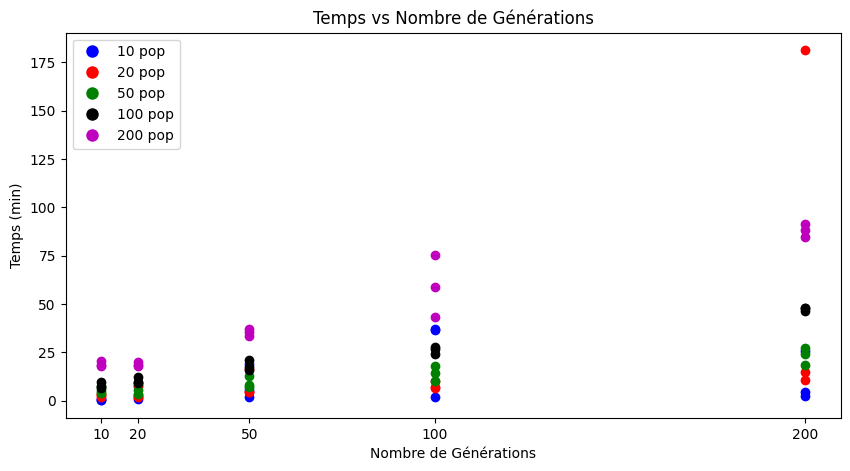

In [6]:
# Graphique du temps vs. nombre de générations
plt.figure(figsize=(10, 5))
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='10 pop'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='20 pop'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='50 pop'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='100 pop'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='m', markersize=10, label='200 pop')
]

j = 0 
for _pop in Pop_list : 
    if _pop == 10 :
        color='b'
    if _pop == 20 : 
        color='r'
    if _pop == 50 : 
        color = 'g'
    if _pop == 100 : 
        color = 'k'
    if _pop ==200 : 
        color = 'm' 
    plt.scatter(Gen_list[j],Time_list[j], color=color, marker='o')
    j = j+1
plt.ylabel('Temps (min)')
plt.xlabel('Nombre de Générations')
plt.title('Temps vs Nombre de Générations')
plt.legend(handles=legend_elements)
plt.xticks([10,20,50,100,200])
plt.savefig("Temps_vs_nbgen.png")
plt.show()



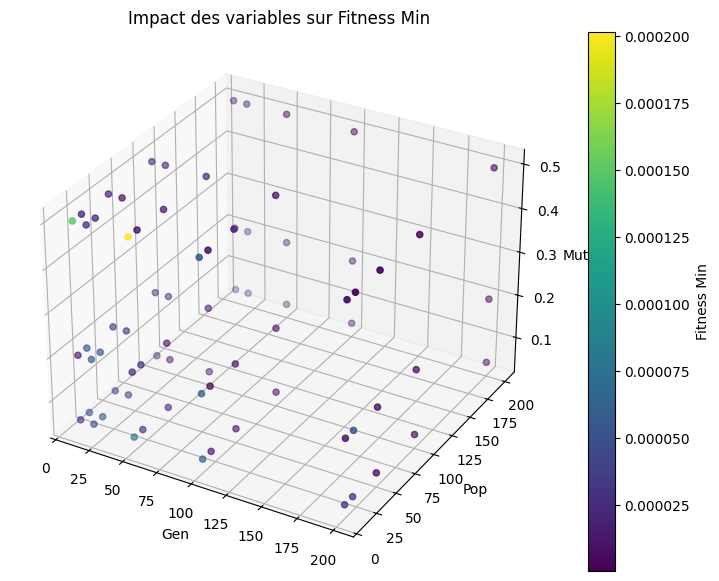

In [7]:
# Création du graphique 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(Gen_list, Pop_list, Mut_list, c=Fit_list, cmap='viridis')

ax.set_xlabel('Gen')
ax.set_ylabel('Pop')
ax.set_zlabel('Mut')
plt.colorbar(sc, label="Fitness Min")
plt.title("Impact des variables sur Fitness Min")
plt.show()


In [8]:
df = pd.DataFrame({'Gen': Gen_list, 'Pop': Pop_list, 'Mut': Mut_list, 'Fitness_Min': Fit_list})


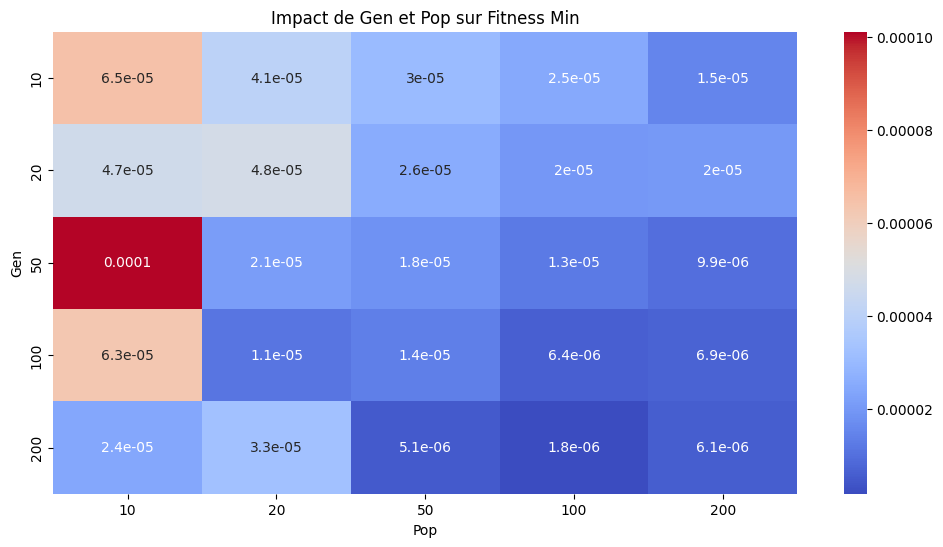

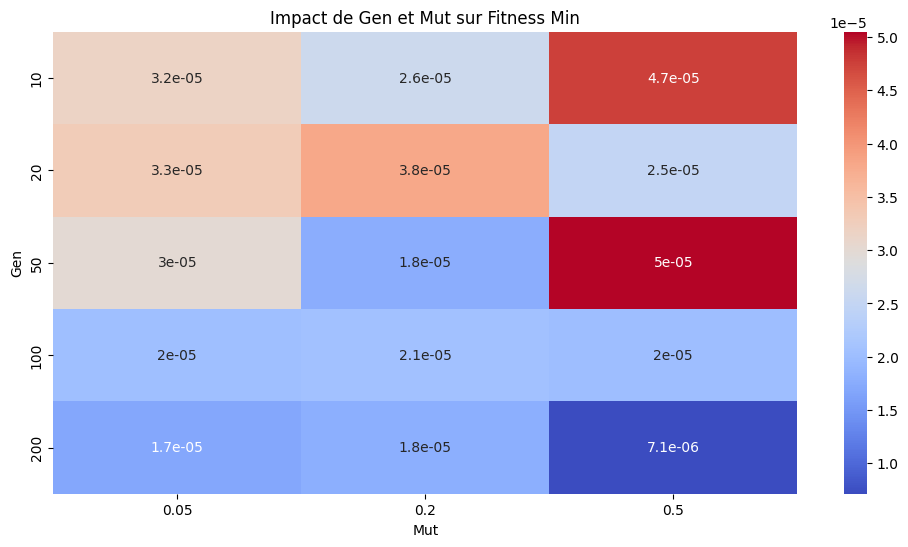

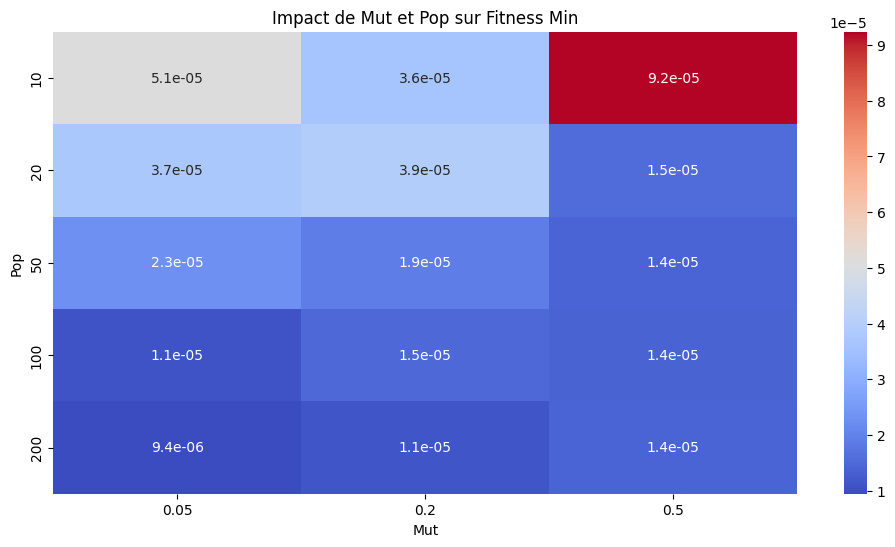

In [9]:
pivot_table = df.pivot_table(values='Fitness_Min', index='Gen', columns='Pop')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True)
plt.title("Impact de Gen et Pop sur Fitness Min")
plt.savefig("Impact_de_Gen_et_Pop_sur_Fitness_Min.png")
plt.show()

pivot_table = df.pivot_table(values='Fitness_Min', index='Gen', columns='Mut')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True)
plt.title("Impact de Gen et Mut sur Fitness Min")
plt.savefig("Impact_de_Gen_et_Mut_sur_Fitness_Min.png")
plt.show()

pivot_table = df.pivot_table(values='Fitness_Min', index='Pop', columns='Mut')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True)
plt.title("Impact de Mut et Pop sur Fitness Min")
plt.savefig("Impact_de_Pop_et_Mut_sur_Fitness_Min.png")
plt.show()

In [10]:
print(dict["Fitness Min"])

[1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999274e-05, 1.2499999999999

In [11]:
data = []
for value in All_value:
    data.append((value["Mut"],value["Fitness Min"].nunique()))

AttributeError: 'list' object has no attribute 'nunique'

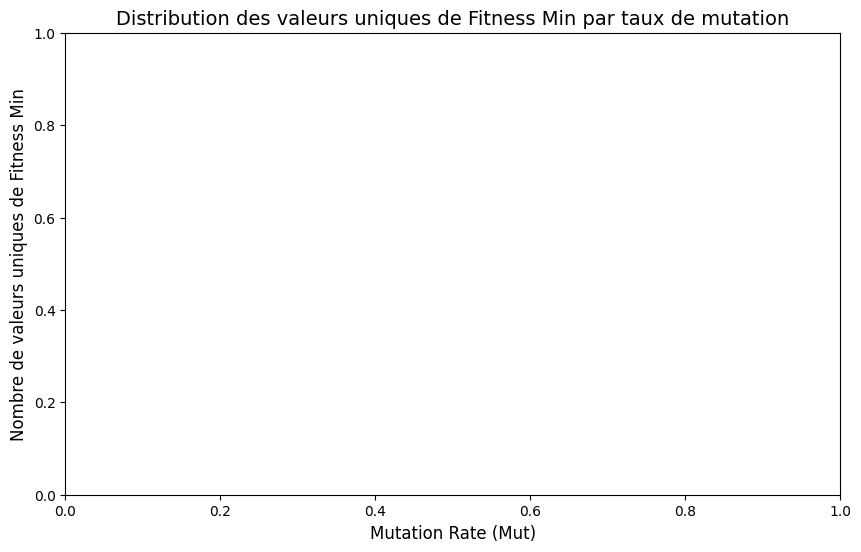

In [12]:
# Création d'un DataFrame
df = pd.DataFrame(data, columns=['Mut', 'Unique_Fitness_Min'])

# Création du box plot avec seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Mut'], y=df['Unique_Fitness_Min'], palette='coolwarm')

# Ajout des titres et labels
plt.xlabel("Mutation Rate (Mut)", fontsize=12)
plt.ylabel("Nombre de valeurs uniques de Fitness Min", fontsize=12)
plt.title("Distribution des valeurs uniques de Fitness Min par taux de mutation", fontsize=14)

# Affichage du graphique
plt.show()

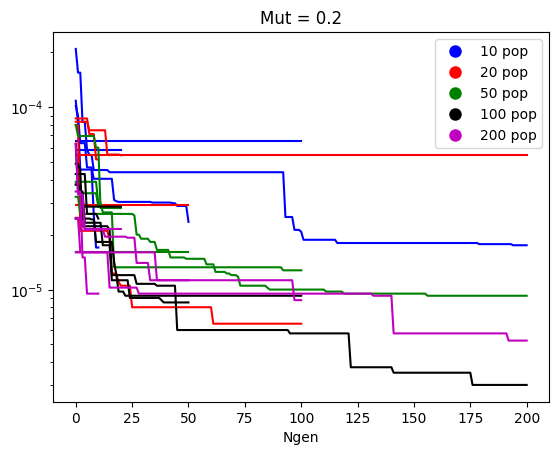

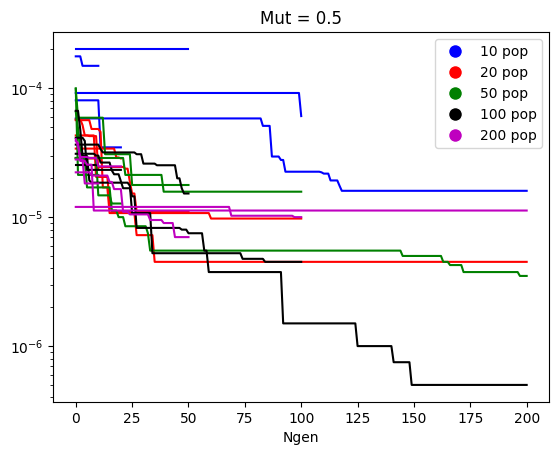

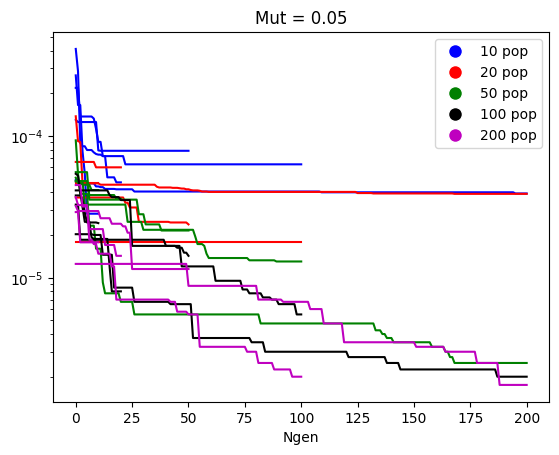

In [13]:
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='10 pop'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='20 pop'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='50 pop'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='100 pop'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='m', markersize=10, label='200 pop')
]

for value in All_value:
    _pop = value["Pop"]
    if _pop == 10 :
        color='b'
    if _pop == 20 : 
        color='r'
    if _pop == 50 : 
        color = 'g'
    if _pop == 100 : 
        color = 'k'
    if _pop ==200 : 
        color = 'm' 
     
    if value["Mut"] ==0.05 : 
        plt.figure(1)
        plt.plot(value["Fitness Min"],color = color)
        plt.yscale("log")
        plt.title("Mut = 0.05")
        plt.legend(handles=legend_elements)
        plt.xlabel("Ngen")
        
    if value["Mut"] ==0.2 : 
        plt.figure(2)
        plt.plot(value["Fitness Min"],color = color)
        plt.title("Mut = 0.2")
        plt.yscale("log")
        plt.xlabel("Ngen")
        plt.legend(handles=legend_elements)
    if value["Mut"] ==0.5 : 
        plt.figure(3)
        plt.plot(value["Fitness Min"],color = color)
        plt.yscale("log")
        plt.title("Mut = 0.5")
        plt.xlabel("Ngen")
        plt.legend(handles=legend_elements)
        
        